In [8]:
#set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

importin the dependencies..

In [9]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models

Data curation
uploading kaggle json.file


In [10]:
!pip install kaggle

In [11]:
kaggle_credentails = json.load(open('/content/kaggle (1).json'))

In [12]:
#set kaggle API key as ENV variable
os.environ['KAGGLE_USERNAME'] = kaggle_credentails['username']
os.environ['KAGGLE_KEY'] =kaggle_credentails['key']

In [13]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [14]:
!ls

'kaggle (1).json'  'plantvillage dataset'   plantvillage-dataset.zip   sample_data


In [15]:
#unzip the downloaded dataset
with ZipFile('plantvillage-dataset.zip','r') as zip_ref:
  zip_ref.extractall()

In [16]:
print(os.listdir('plantvillage dataset'))

print(len(os.listdir('plantvillage dataset/segmented')))
print(os.listdir('plantvillage dataset/segmented')[:5])

print(len(os.listdir('plantvillage dataset/color')))
print(len(os.listdir('plantvillage dataset/color')[:5]))

print(len(os.listdir('plantvillage dataset/grayscale')))
print(len(os.listdir('plantvillage dataset/grayscale')[:5]))

['segmented', 'grayscale', 'color']
38
['Peach___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Grape___healthy', 'Blueberry___healthy', 'Apple___healthy']
38
5
38
5


number of classes=38

In [17]:
print(len(os.listdir('/content/plantvillage dataset/color/Grape___healthy')))
print(os.listdir('/content/plantvillage dataset/color/Grape___healthy')[:5])

423
['04991ee7-b17c-420f-90ff-230d4e59361a___Mt.N.V_HL 9055.JPG', '18db578d-ab6c-4469-8e07-01d8c211a91f___Mt.N.V_HL 8983.JPG', '2ad9b06e-ad3f-4da1-999b-fefe59ebf9e1___Mt.N.V_HL 6148.JPG', '6ff46c3b-bcbe-4a9b-8286-425cb92cb2ee___Mt.N.V_HL 8947.JPG', '3c75e76c-2e1f-478f-aadc-f3decb68c9b0___Mt.N.V_HL 6108.JPG']


data processing

In [18]:
#data path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


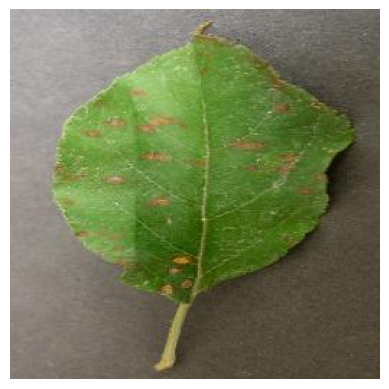

In [19]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust//content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

#read image
image_path = os.path.join(base_dir, 'Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG')
img = mpimg.imread(image_path)

print(img.shape)

#display image
plt.imshow(img)
plt.axis('off') #turn off axis numbers
plt.show()

In [20]:
#image parameters
img_size = 224
batch_size = 32

train test split

In [21]:
#image data generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 #useing 20%data for validation
)

In [22]:
#train generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [23]:
#validation gen
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


Convolutional Neural Network

In [24]:
#model definition
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(img_size,img_size,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation='relu',))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(train_generator.num_classes,activation='softmax'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
#model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
#compile the model
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

model training

In [27]:
#training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//batch_size,  #num of stps per epoch
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size #validation steps
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 146s 101ms/step - accuracy: 0.6046 - loss: 1.8668 - val_accuracy: 0.8136 - val_loss: 0.5876
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.6787
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 178s 89ms/step - accuracy: 0.9149 - loss: 0.2616 - val_accuracy: 0.8532 - val_loss: 0.5078
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 11us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 2.3842e-07
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 119s 88ms/step - accuracy: 0.9645 - loss: 0.1110 - val_accuracy: 0.8825 - val_loss: 0.4210


In [27]:
#model evalution
print("Evaluating model....")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples//batch_soze)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

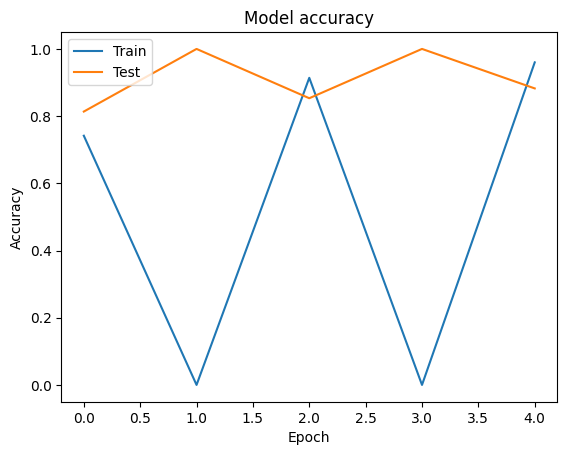

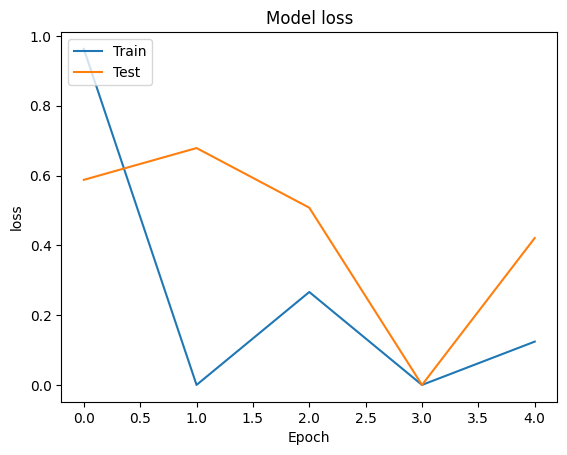

In [28]:
#plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#plot traing & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Building a predictive system

In [29]:
# Function to load process the image using pillow
def load_and_preprocesss_image(image_path, target_size=(224,224)):
  #load immage
  img = Image.open(image_path)
  #resize image
  img = img.resize(target_size)
  #convert image to numpy array
  img_array = np.array(img)
  #Add batch dimension
  img_array = np.extend_dims(img_array, axis=0)
  #scale image values to [0,1]
  image_array = img_array.astype('float32') / 255.
  return img_array

  #function to predict he class of an image
  def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions,axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name



In [30]:
#funtion to predict the class of an image
def predict_image_class(model, image_path, class_indices):
  preprocessed_img = load_and_preprocess_image(image_path)
  predictions = model.predict(preprocessed_img)
  predicted_class_index = np.argmax(predictions, axis=1)[0]
  predicted_class_name = class_indices[predicted_class_index]
  return predicted_class_name

In [32]:
#create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [33]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [37]:
#saving the cls name as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [44]:
#EXample usage
image_path = '/content/plantvillage dataset/color/Apple___Black_rot/0090d05d-d797-4c99-abd4-3b9cb323a5fd___JR_FrgE.S 8727.JPG'
#image_path = '/content/test_blueberry_healthy.jpg'
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

#output the result
print("predicted Class Name:", predicted_class_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
predicted Class Name: Tomato___Septoria_leaf_spot


In [46]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
